In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("stock_data.csv")
df

,Datasource: Google finance,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,tickers,eps,revenue,price,people
1,GOOGL,27.82,87,845,larry page
2,WMT,4.61,484,65,n.a.
3,MSFT,-1,85,64,bill gates
4,RIL,not available,50,1023,mukesh ambani
5,TATA,5.6,-1,n.a.,ratan tata


In [4]:
df=pd.read_csv("stock_data.csv",skiprows=1)
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [5]:
df=pd.read_csv("stock_data.csv",header=1)
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [7]:
df=pd.read_csv("stock_data.csv",header=1,nrows=2)
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.


In [9]:
df=pd.read_csv("stock_data.csv",header=1,names=["ticket"])
df

,,,,ticket
GOOGL,27.82,87,845,larry page
WMT,4.61,484,65,n.a.
MSFT,-1,85,64,bill gates
RIL,not available,50,1023,mukesh ambani
TATA,5.6,-1,n.a.,ratan tata


In [14]:
df=pd.read_csv("stock_data.csv",header=1,na_values={
    'eps':['not available']
})
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1.00,85,64,bill gates
3,RIL,NaN,50,1023,mukesh ambani
4,TATA,5.60,-1,n.a.,ratan tata


In [16]:
df=pd.read_csv("stock_data.csv",header=1,na_values=['not available',-1,'n.a.','na'])
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87.0,845.0,larry page
1,WMT,4.61,484.0,65.0,NaN
2,MSFT,NaN,85.0,64.0,bill gates
3,RIL,NaN,50.0,1023.0,mukesh ambani
4,TATA,5.60,NaN,NaN,ratan tata


In [17]:
df["pa"]=df["price"]/df["eps"]

In [18]:
df

,tickers,eps,revenue,price,people,pa
0,GOOGL,27.82,87.0,845.0,larry page,30.373832
1,WMT,4.61,484.0,65.0,NaN,14.099783
2,MSFT,NaN,85.0,64.0,bill gates,NaN
3,RIL,NaN,50.0,1023.0,mukesh ambani,NaN
4,TATA,5.60,NaN,NaN,ratan tata,NaN


In [20]:
df.to_csv("pa.csv",index=False)

In [22]:
df_movies=pd.read_excel('movies_db.xlsx','movies')
df_movies.head(4)

,movie_id,title,industry,release_year,imdb_rating,studio,language_id
0,101,K.G.F: Chapter 2,Bollywood,2022,8.4,Hombale Films,3
1,102,Doctor Strange in the Multiverse of Madness,Hollywood,2022,7.0,Marvel Studios,5
2,103,Thor: The Dark World,Hollywood,2013,6.8,Marvel Studios,5
3,104,Thor: Ragnarok,Hollywood,2017,7.9,Marvel Studios,5


In [24]:
df_financials=pd.read_excel('movies_db.xlsx','financials')
df_financials.head(4)

,movie_id,budget,revenue,unit,currency
0,101,1.0,12.5,Billions,INR
1,102,200.0,954.8,Millions,USD
2,103,165.0,644.8,Millions,$$
3,104,180.0,854.0,Millions,Dollars


In [25]:
def Standarise_currency(curr):
    if curr =="$$" or curr =="Dollars":
        return "USD"
    return curr
    
df_financials=pd.read_excel('movies_db.xlsx','financials',converters={
    'currency':Standarise_currency
})
df_financials.head(5)

,movie_id,budget,revenue,unit,currency
0,101,1.0,12.5,Billions,INR
1,102,200.0,954.8,Millions,USD
2,103,165.0,644.8,Millions,USD
3,104,180.0,854.0,Millions,USD
4,105,250.0,670.0,Millions,USD


In [30]:
df_mer=pd.merge(df_movies,df_financials,on='movie_id')
df_mer.head()

,movie_id,title,industry,release_year,imdb_rating,studio,language_id,budget,revenue,unit,currency
0,101,K.G.F: Chapter 2,Bollywood,2022,8.4,Hombale Films,3,1.0,12.5,Billions,INR
1,102,Doctor Strange in the Multiverse of Madness,Hollywood,2022,7.0,Marvel Studios,5,200.0,954.8,Millions,USD
2,103,Thor: The Dark World,Hollywood,2013,6.8,Marvel Studios,5,165.0,644.8,Millions,USD
3,104,Thor: Ragnarok,Hollywood,2017,7.9,Marvel Studios,5,180.0,854.0,Millions,USD
4,105,Thor: Love and Thunder,Hollywood,2022,6.8,Marvel Studios,5,250.0,670.0,Millions,USD


In [31]:
df_mer.to_excel("movies_mer.xlsx",sheet_name="merged",index=False)

In [33]:
df_stocks = pd.DataFrame({
    'tickets': ['GOOGl',"MNT","MST"],
    'price':[35,554,665],
    "pe":[3.4,34.45,34.90],
    "eps":[25.35,434.45,243.4]
})
df_stocks

,tickets,price,pe,eps
0,GOOGl,35,3.40,25.35
1,MNT,554,34.45,434.45
2,MST,665,34.90,243.40


In [34]:
df_weather = pd.DataFrame({
    'day':["1/2/3334","2/35/5667","1/2/5676"],
    'temperature':[2323,344,4554],
    'event':['raim','sunny','ssdsd']
})
df_weather

,day,temperature,event
0,1/2/3334,2323,raim
1,2/35/5667,344,sunny
2,1/2/5676,4554,ssdsd


In [35]:
with pd.ExcelWriter("stocks_weatheerr.xlsx") as writer:
    df_stocks.to_excel(writer,sheet_name="stocks")
    df_weather.to_excel(writer,sheet_name="weater")

In [36]:
 import pandas as pd

In [38]:
df=pd.read_csv("movies_data.csv")
df.head(5)

,movie_id,title,industry,language,release_year,imdb_rating,studio,budget,revenue,unit,currency
0,101,K.G.F: Chapter 2,Bollywood,Kannada,2022,8.4,Hombale Films,1.0,12.5,Billions,INR
1,102,Doctor Strange in the Multiverse of Madness,Hollywood,English,2022,7.0,Marvel Studios,200.0,954.8,Millions,USD
2,103,Thor: The Dark World,Hollywood,English,2013,6.8,Marvel Studios,165.0,644.8,Millions,USD
3,104,Thor: Ragnarok,Hollywood,English,2017,7.9,Marvel Studios,180.0,854.0,Millions,USD
4,105,Thor: Love and Thunder,Hollywood,English,2022,6.8,Marvel Studios,250.0,670.0,Millions,USD


In [45]:
df["year_classify"]= df['release_year'].apply(lambda x: "less than 2000" if x <=2000 else "from 2000")
df.head(4)

,movie_id,title,industry,language,release_year,imdb_rating,studio,budget,revenue,unit,currency,year_classify
0,101,K.G.F: Chapter 2,Bollywood,Kannada,2022,8.4,Hombale Films,1.0,12.5,Billions,INR,from 2000
1,102,Doctor Strange in the Multiverse of Madness,Hollywood,English,2022,7.0,Marvel Studios,200.0,954.8,Millions,USD,from 2000
2,103,Thor: The Dark World,Hollywood,English,2013,6.8,Marvel Studios,165.0,644.8,Millions,USD,from 2000
3,104,Thor: Ragnarok,Hollywood,English,2017,7.9,Marvel Studios,180.0,854.0,Millions,USD,from 2000


In [2]:
import pandas as pd

In [4]:
df=pd.read_csv("fruits_data.csv")
df

,date,apple(1kg),banana(1 dozen),grapes(1kg),mango(1kg),Water Melons(1)
0,01-01-2022,230.0,46.0,65.0,184.0,NaN
1,01-02-2022,237.0,50.0,72.0,173.0,72.0
2,01-03-2022,259.0,NaN,NaN,NaN,93.0
3,01-04-2022,NaN,41.0,75.0,175.0,74.0
4,01-05-2022,240.0,48.0,NaN,185.0,84.0
5,01-06-2022,234.0,45.0,66.0,194.0,93.0
6,01-07-2022,NaN,NaN,70.0,174.0,NaN
7,01-08-2022,236.0,46.0,66.0,187.0,86.0
8,01-09-2022,232.0,41.0,71.0,NaN,93.0
9,01-10-2022,240.0,48.0,NaN,198.0,97.0


In [6]:
df.shape

(10, 6)

In [7]:
df.columns

Index(['date', 'apple(1kg)', 'banana(1 dozen)', 'grapes(1kg)', 'mango(1kg)',
       'Water Melons(1)'],
      dtype='object')

In [8]:
new_df=df.fillna(-1)

In [9]:
new_df

,date,apple(1kg),banana(1 dozen),grapes(1kg),mango(1kg),Water Melons(1)
0,01-01-2022,230.0,46.0,65.0,184.0,-1.0
1,01-02-2022,237.0,50.0,72.0,173.0,72.0
2,01-03-2022,259.0,-1.0,-1.0,-1.0,93.0
3,01-04-2022,-1.0,41.0,75.0,175.0,74.0
4,01-05-2022,240.0,48.0,-1.0,185.0,84.0
5,01-06-2022,234.0,45.0,66.0,194.0,93.0
6,01-07-2022,-1.0,-1.0,70.0,174.0,-1.0
7,01-08-2022,236.0,46.0,66.0,187.0,86.0
8,01-09-2022,232.0,41.0,71.0,-1.0,93.0
9,01-10-2022,240.0,48.0,-1.0,198.0,97.0


In [12]:
new_df=df.fillna({
    'apple(1kg)': df['apple(1kg)'].mean(),
    'banana(1 dozen': df['banana(1 dozen)'].mean(),
    'grapes(1kg)': df['grapes(1kg)'].median(),
    'mango(1kg)':df['mango(1kg)'].median(),
    'Water Melons(1)':"not available"
})

In [13]:
new_df

,date,apple(1kg),banana(1 dozen),grapes(1kg),mango(1kg),Water Melons(1)
0,01-01-2022,230.0,46.0,65.0,184.0,not available
1,01-02-2022,237.0,50.0,72.0,173.0,72.0
2,01-03-2022,259.0,NaN,70.0,184.5,93.0
3,01-04-2022,238.5,41.0,75.0,175.0,74.0
4,01-05-2022,240.0,48.0,70.0,185.0,84.0
5,01-06-2022,234.0,45.0,66.0,194.0,93.0
6,01-07-2022,238.5,NaN,70.0,174.0,not available
7,01-08-2022,236.0,46.0,66.0,187.0,86.0
8,01-09-2022,232.0,41.0,71.0,184.5,93.0
9,01-10-2022,240.0,48.0,70.0,198.0,97.0


In [14]:
new_df = df.fillna(method="ffill")
new_df

,date,apple(1kg),banana(1 dozen),grapes(1kg),mango(1kg),Water Melons(1)
0,01-01-2022,230.0,46.0,65.0,184.0,NaN
1,01-02-2022,237.0,50.0,72.0,173.0,72.0
2,01-03-2022,259.0,50.0,72.0,173.0,93.0
3,01-04-2022,259.0,41.0,75.0,175.0,74.0
4,01-05-2022,240.0,48.0,75.0,185.0,84.0
5,01-06-2022,234.0,45.0,66.0,194.0,93.0
6,01-07-2022,234.0,45.0,70.0,174.0,93.0
7,01-08-2022,236.0,46.0,66.0,187.0,86.0
8,01-09-2022,232.0,41.0,71.0,187.0,93.0
9,01-10-2022,240.0,48.0,71.0,198.0,97.0


In [15]:
import pandas as pd

In [16]:
df=pd.read_csv("food_db.csv")
df.head()

,food_id,name,discount,price,rating
0,1,Butter Chicken,10%,$12.99,Excellent
1,2,Masala Dosa,5%,$7.50,Good
2,3,Biryani,15%,$15.99,Excellent
3,4,Chaat,20%,$3.99,Average
4,5,Samosas,10%,$2.50,Good


In [17]:
df.shape

(10, 5)

In [18]:
df


,food_id,name,discount,price,rating
0,1,Butter Chicken,10%,$12.99,Excellent
1,2,Masala Dosa,5%,$7.50,Good
2,3,Biryani,15%,$15.99,Excellent
3,4,Chaat,20%,$3.99,Average
4,5,Samosas,10%,$2.50,Good
5,6,Chole Bhature,5%,$8.99,Excellent
6,7,Paneer Tikka,10%,$10.99,Very Good
7,8,Idli-Sambar,15%,$6.99,Good
8,9,Rogan Josh,10%,$16.99,Excellent
9,10,Lassi,5%,$3.50,Average


In [21]:
new_df=df.replace({
    '5%' :'13%',
    '10%' : '13%'
})

In [22]:
new_df

,food_id,name,discount,price,rating
0,1,Butter Chicken,13%,$12.99,Excellent
1,2,Masala Dosa,13%,$7.50,Good
2,3,Biryani,15%,$15.99,Excellent
3,4,Chaat,20%,$3.99,Average
4,5,Samosas,13%,$2.50,Good
5,6,Chole Bhature,13%,$8.99,Excellent
6,7,Paneer Tikka,13%,$10.99,Very Good
7,8,Idli-Sambar,15%,$6.99,Good
8,9,Rogan Josh,13%,$16.99,Excellent
9,10,Lassi,13%,$3.50,Average


In [23]:
new_df.replace({
    "Excellent": 4,
    "Very Good": 3,
    "Good":2,
    "Average":1
})

,food_id,name,discount,price,rating
0,1,Butter Chicken,13%,$12.99,4
1,2,Masala Dosa,13%,$7.50,2
2,3,Biryani,15%,$15.99,4
3,4,Chaat,20%,$3.99,1
4,5,Samosas,13%,$2.50,2
5,6,Chole Bhature,13%,$8.99,4
6,7,Paneer Tikka,13%,$10.99,3
7,8,Idli-Sambar,15%,$6.99,2
8,9,Rogan Josh,13%,$16.99,4
9,10,Lassi,13%,$3.50,1


In [24]:
df=pd.read_csv("weather_by_cities.csv")
df.head()

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny


In [27]:
df[df.city=='new york'].temperature.max()

36

In [31]:
g= df.groupby("city")

for city, data in g:
    print("city", city)
    print("\n")
    print("DATA",data)

city mumbai


DATA         day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
city new york


DATA         day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
city paris


DATA          day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


In [32]:
g.get_group("paris")

,day,city,temperature,windspeed,event
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy
10,1/3/2017,paris,54,8,Cloudy
11,1/4/2017,paris,42,10,Cloudy


In [33]:
a=df.groupby('day' if df.'temperature'>=80 and df.'temparature'<=90)

SyntaxError: expected 'else' after 'if' expression (2146276831.py, line 1)

In [36]:
filterd=df[(df.temperature >=80) & (df.temperature <=90)]
a =filterd.groupby('day')

In [41]:
for key,data in a:
    print(key)
    print(data)

1/1/2017
        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
1/2/2017
        day    city  temperature  windspeed event
5  1/2/2017  mumbai           85         12   Fog
1/3/2017
        day    city  temperature  windspeed event
6  1/3/2017  mumbai           87         15   Fog


In [40]:
filterd

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog


In [ ]:
def grouper(df,idx,col):
    if 80 <= df[col].loc[idx] <=90:
        return '80-90'
    elif 50 <= df[col].loc[idx] <=60:
        return '50-60'
    else:
        return 'others'

g= df.groupby(lambda idx: grouper(df,idx,'temperature'))
g

In [51]:
df
df.drop('temperature_range', axis=1 , inplace=True)
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [57]:
df['temp range'] = df['temperature'].apply(lambda x : '80-90' if 80<=x <=90 else '50-60'if 50<=x<=60 else 'others')
df

,day,city,temperature,windspeed,event,temp range
0,1/1/2017,new york,32,6,Rain,others
1,1/2/2017,new york,36,7,Sunny,others
2,1/3/2017,new york,28,12,Snow,others
3,1/4/2017,new york,33,7,Sunny,others
4,1/1/2017,mumbai,90,5,Sunny,80-90
5,1/2/2017,mumbai,85,12,Fog,80-90
6,1/3/2017,mumbai,87,15,Fog,80-90
7,1/4/2017,mumbai,92,5,Rain,others
8,1/1/2017,paris,45,20,Sunny,others
9,1/2/2017,paris,50,13,Cloudy,50-60


In [58]:
a=df.groupby('temp range')

In [59]:
for key,data in a:
    print(key)
    print(data)

50-60
         day   city  temperature  windspeed   event temp range
9   1/2/2017  paris           50         13  Cloudy      50-60
10  1/3/2017  paris           54          8  Cloudy      50-60
80-90
        day    city  temperature  windspeed  event temp range
4  1/1/2017  mumbai           90          5  Sunny      80-90
5  1/2/2017  mumbai           85         12    Fog      80-90
6  1/3/2017  mumbai           87         15    Fog      80-90
others
         day      city  temperature  windspeed   event temp range
0   1/1/2017  new york           32          6    Rain     others
1   1/2/2017  new york           36          7   Sunny     others
2   1/3/2017  new york           28         12    Snow     others
3   1/4/2017  new york           33          7   Sunny     others
7   1/4/2017    mumbai           92          5    Rain     others
8   1/1/2017     paris           45         20   Sunny     others
11  1/4/2017     paris           42         10  Cloudy     others


In [60]:
df=pd.read_csv('movies_data.csv')
df.head()

,movie_id,title,industry,language,release_year,imdb_rating,studio,budget,revenue,unit,currency
0,101,K.G.F: Chapter 2,Bollywood,Kannada,2022,8.4,Hombale Films,1.0,12.5,Billions,INR
1,102,Doctor Strange in the Multiverse of Madness,Hollywood,English,2022,7.0,Marvel Studios,200.0,954.8,Millions,USD
2,103,Thor: The Dark World,Hollywood,English,2013,6.8,Marvel Studios,165.0,644.8,Millions,USD
3,104,Thor: Ragnarok,Hollywood,English,2017,7.9,Marvel Studios,180.0,854.0,Millions,USD
4,105,Thor: Love and Thunder,Hollywood,English,2022,6.8,Marvel Studios,250.0,670.0,Millions,USD


In [62]:
df.shape

(37, 11)

In [63]:
df.describe

<bound method NDFrame.describe of     movie_id                                        title   industry language  \
0        101                             K.G.F: Chapter 2  Bollywood  Kannada   
1        102  Doctor Strange in the Multiverse of Madness  Hollywood  English   
2        103                        Thor: The Dark World   Hollywood  English   
3        104                              Thor: Ragnarok   Hollywood  English   
4        105                      Thor: Love and Thunder   Hollywood  English   
5        111                     The Shawshank Redemption  Hollywood  English   
6        113                                 Interstellar  Hollywood  English   
7        115                     The Pursuit of Happyness  Hollywood  English   
8        116                                    Gladiator  Hollywood  English   
9        117                                      Titanic  Hollywood  English   
10       118                        It's a Wonderful Life  Hollywood  Engli

In [64]:
g=df.groupby('industry')

In [66]:
g.size()

industry
Bollywood    17
Hollywood    20
dtype: int64

In [79]:
for key, data in g:
    if key == "bollywood":
        print("Group:", key)
        print(data)

In [80]:
for data,key in g:
    
        print(data)
        print("\n")
        print(key)

Bollywood


    movie_id                        title   industry language  release_year  \
0        101             K.G.F: Chapter 2  Bollywood  Kannada          2022   
21       107  Dilwale Dulhania Le Jayenge  Bollywood    Hindi          1995   
22       108                     3 Idiots  Bollywood    Hindi          2009   
23       109     Kabhi Khushi Kabhie Gham  Bollywood    Hindi          2001   
24       110             Bajirao Mastani   Bollywood    Hindi          2015   
25       128             Taare Zameen Par  Bollywood    Hindi          2007   
26       129          Munna Bhai M.B.B.S.  Bollywood    Hindi          2003   
27       130                           PK  Bollywood    Hindi          2014   
28       131                        Sanju  Bollywood    Hindi          2018   
29       135            The Kashmir Files  Bollywood    Hindi          2022   
30       136            Bajrangi Bhaijaan  Bollywood    Hindi          2015   
31       139                       Race 

In [84]:
a=g.get_group("Bollywood")
a.head(4)

,movie_id,title,industry,language,release_year,imdb_rating,studio,budget,revenue,unit,currency
0,101,K.G.F: Chapter 2,Bollywood,Kannada,2022,8.4,Hombale Films,1.0,12.5,Billions,INR
21,107,Dilwale Dulhania Le Jayenge,Bollywood,Hindi,1995,8.0,Yash Raj Films,400.0,2000.0,Millions,INR
22,108,3 Idiots,Bollywood,Hindi,2009,8.4,Vinod Chopra Films,550.0,4000.0,Millions,INR
23,109,Kabhi Khushi Kabhie Gham,Bollywood,Hindi,2001,7.4,Dharma Productions,390.0,1360.0,Millions,INR


In [85]:
df['imbd_rate']=df.imdb_rating.apply(lambda x : 'Poor' if 1<=x<=3.9 else 'Average' if 4<=x<=7.9 else 'Good' if 8<=x<=10 else 'others')


In [86]:
df

,movie_id,title,industry,language,release_year,imdb_rating,studio,budget,revenue,unit,currency,imbd_rate
0,101,K.G.F: Chapter 2,Bollywood,Kannada,2022,8.4,Hombale Films,1.00,12.5,Billions,INR,Good
1,102,Doctor Strange in the Multiverse of Madness,Hollywood,English,2022,7.0,Marvel Studios,200.00,954.8,Millions,USD,Average
2,103,Thor: The Dark World,Hollywood,English,2013,6.8,Marvel Studios,165.00,644.8,Millions,USD,Average
3,104,Thor: Ragnarok,Hollywood,English,2017,7.9,Marvel Studios,180.00,854.0,Millions,USD,Average
4,105,Thor: Love and Thunder,Hollywood,English,2022,6.8,Marvel Studios,250.00,670.0,Millions,USD,Average
5,111,The Shawshank Redemption,Hollywood,English,1994,9.3,Castle Rock Entertainment,25.00,73.3,Millions,USD,Good
6,113,Interstellar,Hollywood,English,2014,8.6,Warner Bros. Pictures,165.00,701.8,Millions,USD,Good
7,115,The Pursuit of Happyness,Hollywood,English,2006,8.0,Columbia Pictures,55.00,307.1,Millions,USD,Good
8,116,Gladiator,Hollywood,English,2000,8.5,Universal Pictures,103.00,460.5,Millions,USD,Good
9,117,Titanic,Hollywood,English,1997,7.9,Paramount Pictures,200.00,2202.0,Millions,USD,Average


In [90]:
a=df.groupby('imbd_rate')
for data,key in a:
    print(data)
    print("\n")
    print(key)

Average


    movie_id                                        title   industry language  \
1        102  Doctor Strange in the Multiverse of Madness  Hollywood  English   
2        103                        Thor: The Dark World   Hollywood  English   
3        104                              Thor: Ragnarok   Hollywood  English   
4        105                      Thor: Love and Thunder   Hollywood  English   
9        117                                      Titanic  Hollywood  English   
11       119                                       Avatar  Hollywood  English   
19       137           Captain America: The First Avenger  Hollywood  English   
20       138          Captain America: The Winter Soldier  Hollywood  English   
23       109                     Kabhi Khushi Kabhie Gham  Bollywood    Hindi   
24       110                             Bajirao Mastani   Bollywood    Hindi   
34       132                    Pushpa: The Rise - Part 1  Bollywood   Telugu   

    release_year 

In [91]:
df1=pd.read_csv("movies.csv")
df1.head()

,movie_id,title,industry,release_year,imdb_rating,studio,language_id
0,101,K.G.F: Chapter 2,Bollywood,2022,8.4,Hombale Films,3
1,102,Doctor Strange in the Multiverse of Madness,Hollywood,2022,7.0,Marvel Studios,5
2,103,Thor: The Dark World,Hollywood,2013,6.8,Marvel Studios,5
3,104,Thor: Ragnarok,Hollywood,2017,7.9,Marvel Studios,5
4,105,Thor: Love and Thunder,Hollywood,2022,6.8,Marvel Studios,5


In [92]:
df2=pd.read_csv("financials.csv")
df2.head()

,movie_id,budget,revenue,unit,currency
0,101,1.0,12.5,Billions,INR
1,102,200.0,954.8,Millions,USD
2,103,165.0,644.8,Millions,USD
3,104,180.0,854.0,Millions,USD
4,105,250.0,670.0,Millions,USD


In [93]:
df3=pd.read_csv("languages.csv")
df3.head()

,language_id,lang_name
0,1,Hindi
1,2,Telugu
2,3,Kannada
3,4,Tamil
4,5,English


In [94]:
df_new_movies=pd.read_csv("new_movies.csv")
df_new_movies.head()

,movie_id,title,industry,release_year,imdb_rating,studio,language_id
0,201,Pathaan,Bollywood,2023,6.6,Yash Raj Films,1
1,210,Vikram,Bollywood,2022,8.3,Raaj Kamal Films International,4
2,240,Black Panther: Wakanda Forever,Hollywood,200,6.9,Marvel Studios,5


In [95]:
df1=pd.concat([df1,df_new_movies], ignore_index=True)

In [96]:
df1

,movie_id,title,industry,release_year,imdb_rating,studio,language_id
0,101,K.G.F: Chapter 2,Bollywood,2022,8.4,Hombale Films,3
1,102,Doctor Strange in the Multiverse of Madness,Hollywood,2022,7.0,Marvel Studios,5
2,103,Thor: The Dark World,Hollywood,2013,6.8,Marvel Studios,5
3,104,Thor: Ragnarok,Hollywood,2017,7.9,Marvel Studios,5
4,105,Thor: Love and Thunder,Hollywood,2022,6.8,Marvel Studios,5
5,106,Sholay,Bollywood,1975,8.1,United Producers,1
6,107,Dilwale Dulhania Le Jayenge,Bollywood,1995,8.0,Yash Raj Films,1
7,108,3 Idiots,Bollywood,2009,8.4,Vinod Chopra Films,1
8,109,Kabhi Khushi Kabhie Gham,Bollywood,2001,7.4,Dharma Productions,1
9,110,Bajirao Mastani,Bollywood,2015,7.2,NaN,1


In [99]:
df1.tail(5)

,movie_id,title,industry,release_year,imdb_rating,studio,language_id
37,139,Race 3,Bollywood,2018,1.9,Salman Khan Films,1
38,140,Shershaah,Bollywood,2021,8.4,Dharma Productions,1
39,201,Pathaan,Bollywood,2023,6.6,Yash Raj Films,1
40,210,Vikram,Bollywood,2022,8.3,Raaj Kamal Films International,4
41,240,Black Panther: Wakanda Forever,Hollywood,200,6.9,Marvel Studios,5


In [100]:
df1=pd.merge(df1,df3, on="language_id", how="inner")

In [101]:
df1

,movie_id,title,industry,release_year,imdb_rating,studio,language_id,lang_name
0,101,K.G.F: Chapter 2,Bollywood,2022,8.4,Hombale Films,3,Kannada
1,102,Doctor Strange in the Multiverse of Madness,Hollywood,2022,7.0,Marvel Studios,5,English
2,103,Thor: The Dark World,Hollywood,2013,6.8,Marvel Studios,5,English
3,104,Thor: Ragnarok,Hollywood,2017,7.9,Marvel Studios,5,English
4,105,Thor: Love and Thunder,Hollywood,2022,6.8,Marvel Studios,5,English
5,111,The Shawshank Redemption,Hollywood,1994,9.3,Castle Rock Entertainment,5,English
6,112,Inception,Hollywood,2010,8.8,Warner Bros. Pictures,5,English
7,113,Interstellar,Hollywood,2014,8.6,Warner Bros. Pictures,5,English
8,115,The Pursuit of Happyness,Hollywood,2006,8.0,Columbia Pictures,5,English
9,116,Gladiator,Hollywood,2000,8.5,Universal Pictures,5,English


In [ ]:
df1.to_csv('final_complete.csv', columns=[])

In [108]:
!pip install matplotlib
from matplotlib import pyplot as plt

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, '101'),
  Text(1, 0, '102'),
  Text(2, 0, '103'),
  Text(3, 0, '104'),
  Text(4, 0, '105'),
  Text(5, 0, '107'),
  Text(6, 0, '108'),
  Text(7, 0, '109'),
  Text(8, 0, '110'),
  Text(9, 0, '111'),
  Text(10, 0, '113'),
  Text(11, 0, '114'),
  Text(12, 0, '115'),
  Text(13, 0, '116'),
  Text(14, 0, '117'),
  Text(15, 0, '118'),
  Text(16, 0, '119'),
  Text(17, 0, '120'),
  Text(18, 0, '121'),
  Text(19, 0, '122'),
  Text(20, 0, '123'),
  Text(21, 0, '124'),
  Text(22, 0, '125'),
  Text(23, 0, '126'),
  Text(24, 0, '127'),
  Text(25, 0, '128'),
  Text(26, 0, '129'),
  Text(27, 0, '130'),
  Text(28, 0, '131'),
  Text(29, 0, '132'),
  Text(30, 0, '133'),
  Text(31, 0, '134'),
  Text(32, 0, '135'),
  Text(33, 0, '136'),
  Text(34, 0, '137'),
  Text(35, 0, '138'),
  Text(36, 0, '139'),
  Text(37,

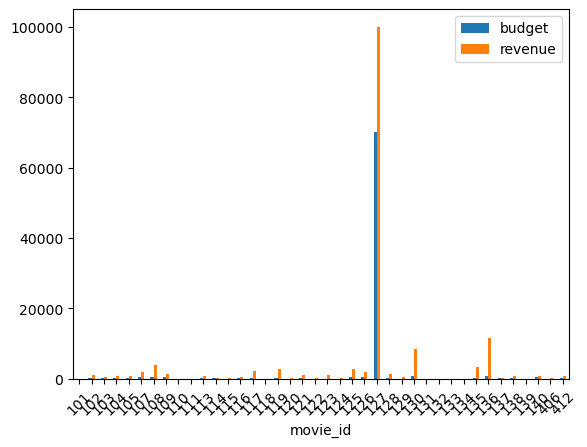

In [110]:
df2.plot(kind="bar",x="movie_id")
plt.xticks(rotation=45)

In [113]:
df2.set_index('movie_id', inplace=True)

<Axes: xlabel='movie_id'>

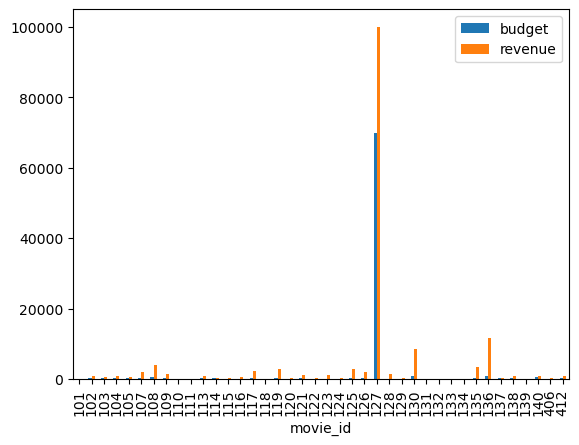

In [114]:
df2.plot(kind="bar")

In [116]:
total=df2[['budget','revenue']].sum()
total

budget      77539.08
revenue    153886.10
dtype: float64

([<matplotlib.patches.Wedge at 0x2a6a4b19c10>,
 [Text(0.5943856310874054, 1.0424517838043288, 'budget'),
  Text(-0.5448535846313843, -0.9555807508077646, 'revenue')],
 [Text(0.34672495146765314, 0.6080968738858583, '33.51%'),
  Text(-0.2971928643443914, -0.5212258640769625, '66.49%')])

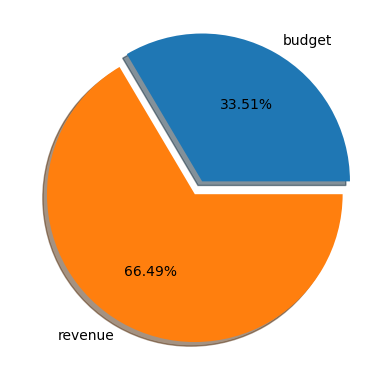

In [120]:
plt.pie(total,labels=total.index, autopct="%1.2f%%", explode=(0.1,0), shadow=True)

(array([39.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.00000e+00, 7.00090e+03, 1.40008e+04, 2.10007e+04, 2.80006e+04,
        3.50005e+04, 4.20004e+04, 4.90003e+04, 5.60002e+04, 6.30001e+04,
        7.00000e+04]),
 <BarContainer object of 10 artists>)

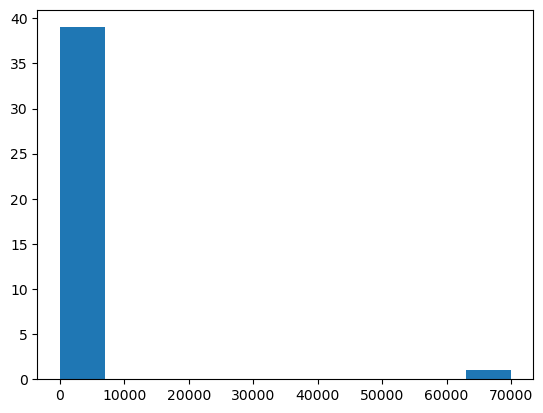

In [121]:
plt.hist(df2['budget'])

In [122]:
import seaborn as sns

<Axes: xlabel='budget', ylabel='Count'>

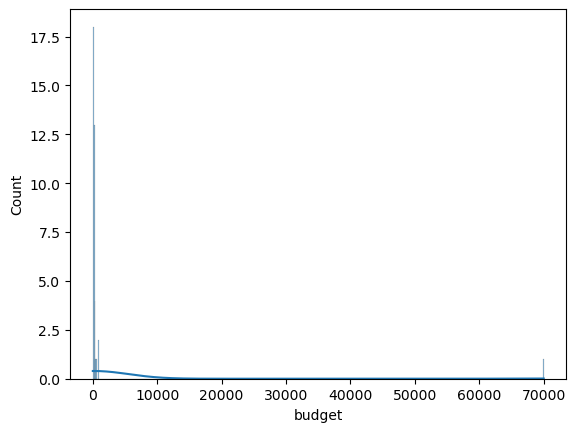

In [124]:
sns.histplot(df2['budget'], kde=True)

In [125]:
df2.head(2)

,budget,revenue,unit,currency
movie_id,,,,
101,1.0,12.5,Billions,INR
102,200.0,954.8,Millions,USD


<Axes: xlabel='budget', ylabel='revenue'>

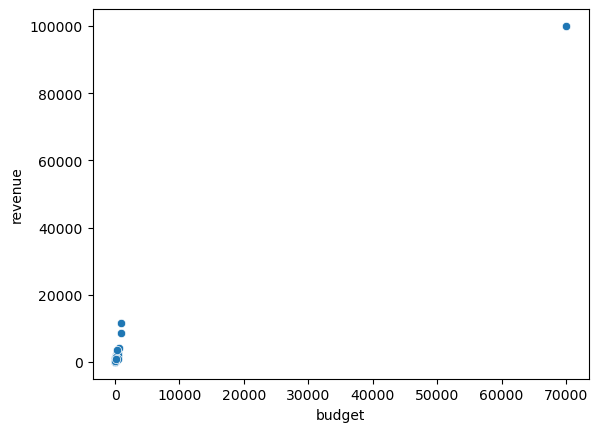

In [126]:
sns.scatterplot(data=df2,x="budget",y='revenue')

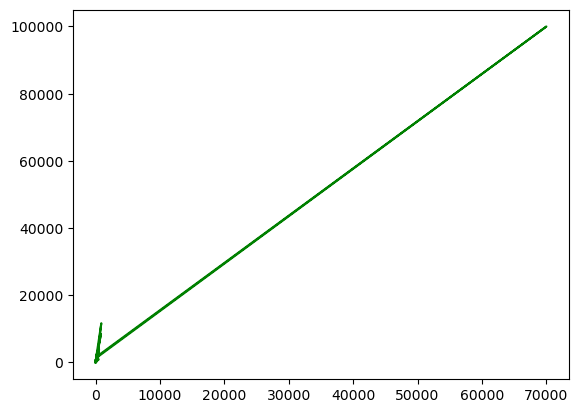

In [127]:
plt.plot(df2['budget'],df2['revenue'], color='green')

In [128]:
import pandas as pd

In [129]:
from matplotlib import pyplot as plt

In [130]:
df=pd.read_csv("shoe_sales.csv")
df.head()

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
1,9/1/2023,Adidas,14.0
2,9/2/2023,Nike,21.0
3,9/2/2023,Adidas,12.0
4,9/3/2023,Nike,18.0


In [131]:
df.shape

(60, 3)

In [133]:
df.describe()

,sold_qty
count,58.000000
mean,27.482759
std,88.519844
min,7.000000
25%,12.250000
50%,16.000000
75%,19.750000
max,689.000000


In [140]:
df[df.sold_qty<12.25].shape

(15, 3)

In [142]:
15/60

0.25

In [135]:
df_nike=df[df.brand=='Nike']
df_nike

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
2,9/2/2023,Nike,21.0
4,9/3/2023,Nike,18.0
6,9/4/2023,Nike,22.0
8,9/5/2023,Nike,20.0
10,9/6/2023,Nike,23.0
12,9/7/2023,Nike,19.0
14,9/8/2023,Nike,17.0
16,9/9/2023,Nike,25.0
18,9/10/2023,Nike,14.0


In [136]:
df_nike.describe()

,sold_qty
count,28.000000
mean,19.642857
std,3.117624
min,14.000000
25%,17.000000
50%,19.500000
75%,22.000000
max,25.000000


In [137]:
df_nike.sold_qty.sum()

550.0

In [146]:
val = round(df_nike.sold_qty.median())
val

20

In [153]:
df_nike[df_nike.sold_qty.isnull()]

,date,brand,sold_qty
32,9/17/2023,Nike,NaN
48,9/25/2023,Nike,NaN


In [154]:
df_nike.fillna({'sold_qty': val}, inplace=True)

C:\Users\KISHORE\AppData\Local\Temp\ipykernel_34016\3969897079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike.fillna({'sold_qty': val}, inplace=True)


In [158]:
df_nike.loc[[32,48]]

,date,brand,sold_qty
32,9/17/2023,Nike,20.0
48,9/25/2023,Nike,20.0


### Analysing adidas shoes

In [161]:
df_adidas = df[df.brand=='Adidas']
df_adidas.head()

,date,brand,sold_qty
1,9/1/2023,Adidas,14.0
3,9/2/2023,Adidas,12.0
5,9/3/2023,Adidas,11.0
7,9/4/2023,Adidas,13.0
9,9/5/2023,Adidas,10.0


In [162]:
df_adidas.shape

(30, 3)

In [163]:
df_adidas.describe()

,sold_qty
count,30.000000
mean,34.800000
std,123.602366
min,7.000000
25%,10.000000
50%,12.500000
75%,15.000000
max,689.000000


In [165]:
round(df_adidas.sold_qty.median())

12

In [182]:
df_adidas.sold_qty.quantile([0.95])

0.95    17.55
Name: sold_qty, dtype: float64

In [183]:
df_adidas[df_adidas.sold_qty>17.55]

,date,brand,sold_qty
39,9/20/2023,Adidas,19.0
41,9/21/2023,Adidas,18.0


In [176]:
def plot_qty():
    plt.figure(figsize=(15, 6))
    
    dates = df_nike['date']
    
    plt.plot(dates, df_nike['sold_qty'], marker='o', label='Nike', color='blue')
    plt.plot(dates, df_adidas['sold_qty'], marker='o', label='Adidas', color='red')
    
    plt.xlabel('Date')
    plt.ylabel('Total Qty Sold')
    plt.title('Daily Sales Qty for Nike and Adidas in September 2023')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

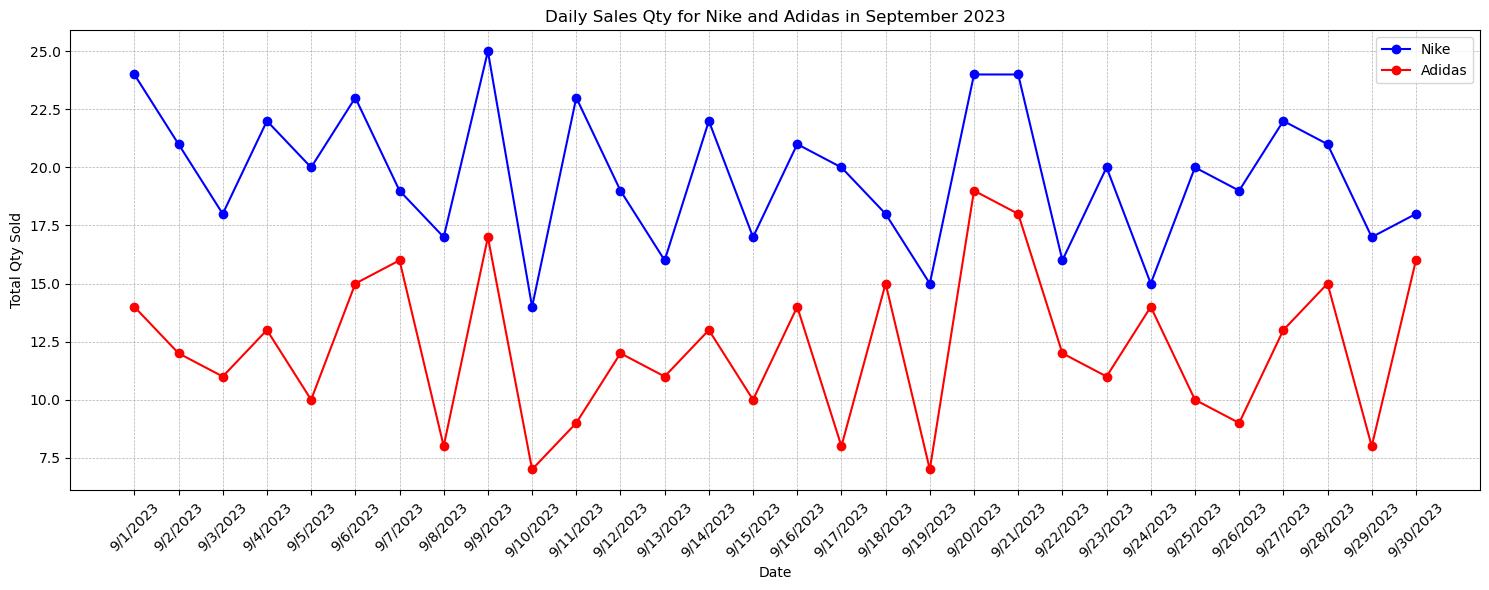

In [177]:
plot_qty()

In [174]:
val=round(df_adidas.sold_qty.median())
val

12

In [175]:
df_adidas.sold_qty.replace(689,val, inplace=True)

C:\Users\KISHORE\AppData\Local\Temp\ipykernel_34016\3598278759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adidas.sold_qty.replace(689,val, inplace=True)


In [184]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [187]:
customer_df=pd.read_csv("telecom_customer_churn.csv")
pd.set_option("display.max_columns", None)
customer_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [188]:
customer_df.shape

(7043, 21)

In [190]:
customer_df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [193]:
customer_df.isnull().sum()

customer_id          0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

In [199]:
customer_df.dtypes

customer_id           object
gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges         object
churn                 object
dtype: object

In [208]:
con_df=['monthly_charges', 'total_charges', 'tenure']
customer_df[con_df]=customer_df[con_df].apply(pd.to_numeric, errors='coerce')

In [209]:
customer_df.monthly_charges.mean()

64.76169246059918

In [210]:
customer_df.monthly_charges.median()

70.35

In [211]:
customer_df.monthly_charges.mode()

0    20.05
Name: monthly_charges, dtype: float64

In [214]:
customer_df.total_charges.quantile([0.25,0.5,0.75])

0.25     401.4500
0.50    1397.4750
0.75    3794.7375
Name: total_charges, dtype: float64

In [215]:
customer_df.monthly_charges.max() - customer_df.monthly_charges.min()

100.5

In [217]:
no_churn_df=customer_df[customer_df.churn=="No"]

In [218]:
no_churn_df.monthly_charges.quantile([0.25])

0.25    25.1
Name: monthly_charges, dtype: float64

In [219]:
churn_df=customer_df[customer_df.churn=="Yes"]

In [220]:
churn_df.total_charges.quantile([0.75])

0.75    2331.3
Name: total_charges, dtype: float64

In [221]:
churn_df.payment_method.mode()

0    Electronic check
Name: payment_method, dtype: object

In [222]:
chrn_montomon = churn_df[churn_df.contract=="Month-to-month"]

In [223]:
chrn_montomon.total_charges.mean()

1164.4605740181269

In [224]:
chrn_twomonth= no_churn_df[no_churn_df.contract=="Two year"]

In [225]:
chrn_twomonth.tenure.median()

64.0

In [226]:
df=pd.read_csv("heights.csv")
df.head()

,name,height
0,mohan,1.2
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2


In [227]:
df.describe()

,height
count,20.000000
mean,7.305000
std,7.839003
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


In [235]:
Q1,Q3=df.height.quantile([0.25,0.75])
Q1,Q3

(5.3500000000000005, 6.275)

In [236]:
IQR =(Q3-Q1)
IQR

0.9249999999999998

In [238]:
lower=(Q1-1.5*IQR)
upper=(Q3+1.5*IQR)
upper

7.6625

In [239]:
lower

3.962500000000001

In [244]:
df[(df.height<lower) |  (df.height>upper)]

,name,height
0,mohan,1.2
19,Liu,40.2


In [247]:
 df_new=df[(df.height>lower)&(df.height<upper)]
df_new

,name,height
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8


In [248]:
df=pd.read_excel("region_wise_sales.xlsx")
df.head()

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


In [249]:
df.shape

(36, 4)

In [250]:
df.describe()

,Year,Sales
count,36.0,36.000000
mean,2022.0,23755.500000
std,0.0,9220.861824
min,2022.0,9665.000000
25%,2022.0,14523.750000
50%,2022.0,23836.000000
75%,2022.0,30358.000000
max,2022.0,38143.000000


In [251]:
df.isnull().sum()

Month     0
Year      0
Region    0
Sales     0
dtype: int64

In [253]:
df.Region.unique()

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [254]:
df_apac=df[df.Region=="APAC"]
df_europe=df[df.Region=="Europe"]
df_america=df[df.Region=="America"]

In [265]:
def get_lower_upper(data):
    Q1,Q3=data.Sales.quantile([0.25,0.75])
    IQR=(Q3-Q1)
    lower=(Q1-1.5*IQR)
    upper=(Q3+1.5*IQR)
    return lower,upper

In [270]:
lower, upper = get_lower_upper(df_america)
lower,upper

(nan, nan)

In [266]:
lower, upper = get_lower_upper(df_apac)
lower,upper

(-737.125, 59747.875)

In [264]:
df_apac.Sales.describe()

count       12.000000
mean     29762.166667
std       7725.522905
min      18579.000000
25%      21944.750000
50%      31215.500000
75%      37066.000000
max      38143.000000
Name: Sales, dtype: float64

In [267]:
lower, upper = get_lower_upper(df_europe)
lower,upper

(7306.875, 17665.875)

In [268]:
df_europe.Sales.describe()

count       12.000000
mean     13147.583333
std       3549.568795
min       9665.000000
25%      11191.500000
50%      12044.000000
75%      13781.250000
max      23000.000000
Name: Sales, dtype: float64

In [269]:
df_europe[df_europe.Sales>upper]

,Month,Year,Region,Sales
21,October,2022,Europe,23000


In [273]:
labels=df.Region.unique()
labels

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [282]:
plot_data=[df['Sales'][df["Region"]==label].values for label in labels]
plot_data

[array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
        37279, 21388, 21896], dtype=int64),
 array([ 9665, 10297, 11079, 13410, 11229, 15352, 13286, 11470, 11873,
        23000, 12215, 14895], dtype=int64),
 array([30247, 29284, 27904, 23407, 23716, 25077, 33649, 24560, 34102,
        28257, 30691, 29387], dtype=int64)]

In [286]:
df.head(5)

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


In [307]:

region_data = df[df.Region == 'APAC']

region_data.Sales.to_numpy()


array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
       37279, 21388, 21896], dtype=int64)

In [327]:
# Initialize an empty dictionary to store Sales arrays for each region
sales_by_region = {}

# Loop through each label in labels
for label in labels:
    # Filter rows where the Region matches the current label
    region_data = df[df.Region == label]
    
    # Check if there are rows in this filtered DataFrame
    if not region_data.empty:
        # Convert the 'Sales' column of the current region to a NumPy array
        sales_by_region[label] = region_data['Sales'].to_numpy()

# Now `sales_by_region` contains the Sales arrays for each region
print(sales_by_region)


{'APAC': array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
       37279, 21388, 21896], dtype=int64), 'Europe': array([ 9665, 10297, 11079, 13410, 11229, 15352, 13286, 11470, 11873,
       23000, 12215, 14895], dtype=int64), 'Americas': array([30247, 29284, 27904, 23407, 23716, 25077, 33649, 24560, 34102,
       28257, 30691, 29387], dtype=int64)}


In [330]:
sales_by_region

{'APAC': array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
        37279, 21388, 21896], dtype=int64),
 'Europe': array([ 9665, 10297, 11079, 13410, 11229, 15352, 13286, 11470, 11873,
        23000, 12215, 14895], dtype=int64),
 'Americas': array([30247, 29284, 27904, 23407, 23716, 25077, 33649, 24560, 34102,
        28257, 30691, 29387], dtype=int64)}

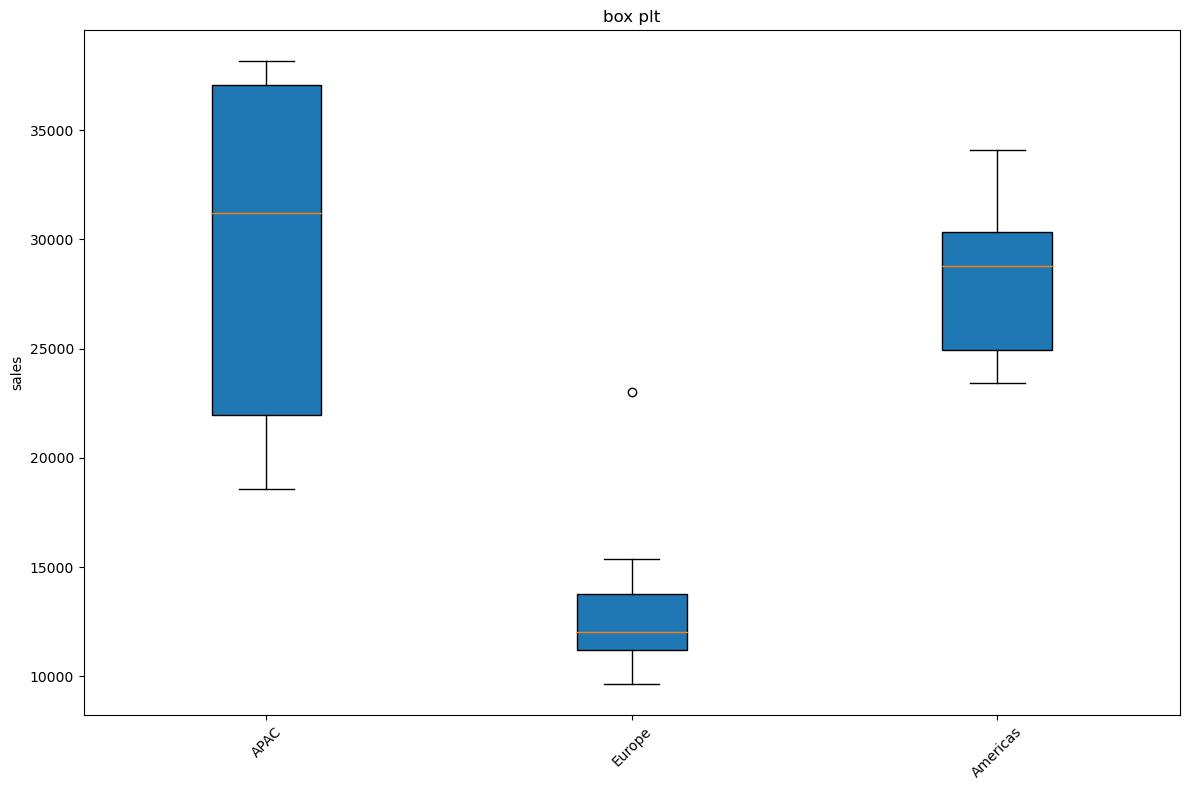

In [333]:
plt.figure(figsize=(12,8))
plt.boxplot(plot_data,labels=labels,vert=True, patch_artist=True)
plt.title("box plt")
plt.ylabel("sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [337]:
plot_data=[df["Sales"][df["Region"]==label].values for label in labels]
plot_data

[array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
        37279, 21388, 21896], dtype=int64),
 array([ 9665, 10297, 11079, 13410, 11229, 15352, 13286, 11470, 11873,
        23000, 12215, 14895], dtype=int64),
 array([30247, 29284, 27904, 23407, 23716, 25077, 33649, 24560, 34102,
        28257, 30691, 29387], dtype=int64)]

In [338]:
df = pd.read_excel("fitness_data.xlsx")
df.head()

,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
0,Akshay,10500,4500,7.5,80
1,Priya,9800,4200,7.2,75
2,Raj,11500,4800,7.0,90
3,Emily,12000,5000,7.8,85
4,Rohit,8900,4000,7.0,70


In [340]:
df.shape

(50, 5)

In [341]:
df.columns

Index(['name', 'steps_taken', 'calories_burned', 'sleep_duration(hours)',
       'water_intake(ounces)'],
      dtype='object')

In [342]:
df.describe()

,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
count,50.000000,50.000000,50.000000,50.000000
mean,10316.000000,4418.000000,7.396000,79.600000
std,1177.052701,370.708092,1.660951,14.457538
min,8000.000000,3700.000000,4.000000,30.000000
25%,9625.000000,4200.000000,7.000000,70.000000
50%,10250.000000,4400.000000,7.200000,80.000000
75%,11000.000000,4700.000000,7.500000,90.000000
max,15000.000000,5500.000000,18.000000,100.000000


In [344]:
df.steps_taken.median()

10250.0

In [345]:
df.calories_burned.median()

4400.0

In [348]:
df['sleep_duration(hours)'].median()

7.2

In [349]:
df['water_intake(ounces)'].median()

80.0